In [85]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style("darkgrid")
sns.set_context(context="paper", font_scale=1.5, rc=None)
sns.set(font="serif")
import seaborn

import geopandas as gpd
import matplotlib.pyplot as plt

import libpysal
from libpysal  import weights
from pysal.explore import esda 
import esda
from esda.moran import Moran, Moran_Local

import splot
from splot.esda import moran_scatterplot, plot_moran, lisa_cluster
from splot.libpysal import plot_spatial_weights

from giddy.directional import Rose
import os

import contextily




In [86]:
from numpy.random import seed
seed(12345678)

In [87]:
os.chdir('F:/projects/2024/informal')

In [88]:
geojson_data = gpd.read_file("F:/projects/2024/informal/merged2.geojson")

In [56]:
geojson_data

,id,Level_x,asdf_id,gqid_x,shapeGroup_x,shapeID_x,shapeISO_x,shapeName_x,shapeType_x,Level_y,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,geometry
0,0,ADM1,0,0,TUR,TUR-ADM1-80719077B77822815,TR-01,Adana,ADM1,ADM1,...,29.074056,28.879486,28.717164,28.164996,28.065424,28.169607,28.032190,27.962083,27.963184,"MULTIPOLYGON (((35.38791 36.55628, 35.38883 36..."
1,1,ADM1,1,1,TUR,TUR-ADM1-80719077B28599679,TR-02,Adıyaman,ADM1,ADM1,...,30.463650,30.191129,30.059005,29.584176,29.437475,29.383753,29.370084,29.405895,29.467049,"POLYGON ((37.86100 37.46666, 37.87451 37.46648..."
2,2,ADM1,2,2,TUR,TUR-ADM1-80719077B84550223,TR-03,Afyonkarahisar,ADM1,ADM1,...,29.410471,29.017960,28.868278,28.304597,28.053987,28.197262,28.100381,28.123544,28.388501,"POLYGON ((30.48061 38.19903, 30.49275 38.19655..."
3,3,ADM1,3,3,TUR,TUR-ADM1-80719077B65173278,TR-04,Ağrı,ADM1,ADM1,...,31.092032,30.920681,30.768355,30.133650,30.046928,30.068672,29.956799,29.893529,30.042331,"POLYGON ((43.77542 39.25004, 43.79639 39.26875..."
4,4,ADM1,4,4,TUR,TUR-ADM1-80719077B72380009,TR-05,Amasya,ADM1,ADM1,...,29.149678,28.972973,28.654526,28.104956,28.049226,28.235330,28.133426,28.160648,28.537311,"POLYGON ((36.38780 40.66228, 36.39811 40.67508..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,76,ADM1,76,76,TUR,TUR-ADM1-80719077B83749854,TR-77,Yalova,ADM1,ADM1,...,27.540859,27.064284,26.782969,26.344062,26.303003,26.182438,26.271476,26.056398,25.600179,"POLYGON ((29.48180 40.56397, 29.48439 40.56645..."
77,77,ADM1,77,77,TUR,TUR-ADM1-80719077B67647683,TR-66,Yozgat,ADM1,ADM1,...,29.867141,29.399657,29.236928,28.653018,28.719645,28.762025,28.810795,28.693756,29.061970,"POLYGON ((35.33995 40.25508, 35.28463 40.22667..."
78,78,ADM1,78,78,TUR,TUR-ADM1-80719077B51620989,TR-67,Zonguldak,ADM1,ADM1,...,29.217234,28.751137,28.687704,28.219806,27.815600,27.735502,28.050741,27.833101,27.468281,"MULTIPOLYGON (((31.85365 41.00830, 31.88498 41..."
79,79,ADM1,79,79,TUR,TUR-ADM1-80719077B759750,TR-73,Şırnak,ADM1,ADM1,...,30.253428,29.952221,29.914243,29.527439,29.044468,29.077574,28.946730,28.869628,28.986277,"POLYGON ((43.49919 37.74179, 43.43868 37.74784..."


In [98]:
geojson_data['coords'] = geojson_data['geometry'].apply(lambda x: x.representative_point().coords[:])
geojson_data['coords'] = [coords[0] for coords in geojson_data['coords']]

C:\Users\uursavas\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


NameError: name 'merged_data' is not defined

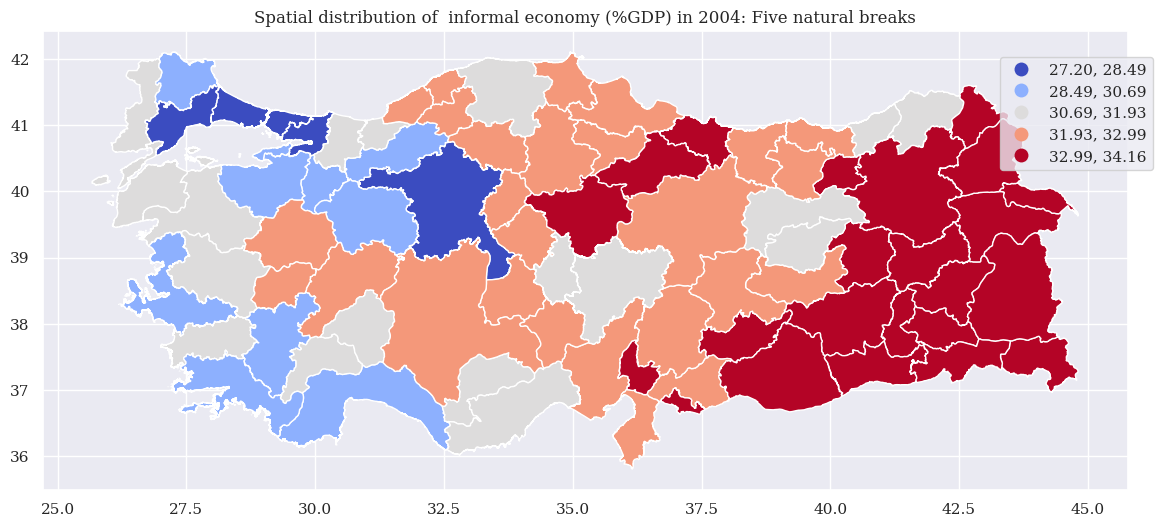

In [99]:
fig, ax = plt.subplots(figsize=(14,8))
geojson_data.plot(column="2004", scheme='NaturalBreaks', k=5, cmap='coolwarm', legend=True, legend_kwds={'title': '', 'bbox_to_anchor':(1.03, 0.96)}, ax=ax)
plt.title('Spatial distribution of  informal economy (%GDP) in 2004: Five natural breaks')
for idx, row in fig, ax = plt.subplots(figsize=(14,8))
merged_data.plot(column="2004", scheme='NaturalBreaks', k=5, cmap='coolwarm', legend=True, legend_kwds={'title': '', 'bbox_to_anchor':(1.03, 0.96)}, ax=ax)
plt.title('Spatial distribution of  informal economy (%GDP) in 2004: Five natural breaks')
for idx, row in merged_data.iterrows():
    ax.annotate(text=row['province'], xy=row['coords'], fontsize=10,
                 horizontalalignment='center', bbox={'facecolor': 'white', 'alpha':0.8, 'pad': 2, 'edgecolor':'none'})


plt.tight_layout()
ax.axis("off")

plt.show().iterrows():
    ax.annotate(text=row['province'], xy=row['coords'], fontsize=10,
                 horizontalalignment='center', bbox={'facecolor': 'white', 'alpha':0.8, 'pad': 2, 'edgecolor':'none'})


plt.tight_layout()
ax.axis("off")

plt.show()

In [89]:
# Build a queen contiguity matrix from a regular 3x3
# lattice stored in a geo-table
w = weights.contiguity.Queen.from_dataframe(geojson_data)
w.transform = "R"
w.neighbors




C:\Users\uursavas\AppData\Local\Temp\ipykernel_20972\3870122094.py:3: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w = weights.contiguity.Queen.from_dataframe(geojson_data)


{0: [36, 41, 57, 61, 46, 63],
 1: [32, 80, 54, 25, 41],
 2: [19, 52, 53, 38, 24, 74, 31],
 3: [17, 37, 59, 75, 44, 30],
 4: [66, 77, 71, 23],
 5: [19, 52, 38, 57, 58, 43],
 6: [64, 11, 30],
 7: [40, 24, 58, 55],
 8: [20, 53, 21, 55, 40],
 9: [48, 50, 18, 52, 22, 10, 31],
 10: [50, 52, 9, 60, 61],
 11: [44, 6, 30],
 12: [42, 45, 78],
 13: [17, 67, 56, 25, 59, 79],
 14: [64, 34, 72, 29, 30],
 15: [65, 18, 51, 20, 53, 31],
 16: [30, 73, 59, 28, 29, 25],
 17: [3, 67, 75, 59, 13],
 18: [65, 9, 42, 78, 15, 22, 26, 31],
 19: [2, 5, 38, 24, 58],
 20: [51, 53, 8, 76, 15],
 21: [8, 27, 70],
 22: [48, 18, 23, 9, 42, 45],
 23: [48, 66, 4, 68, 77, 22, 45],
 24: [2, 19, 7, 74, 55, 58],
 25: [1, 13, 80, 16, 54, 56, 59, 28],
 26: [65, 18, 78],
 27: [49, 21, 70],
 28: [16, 54, 73, 29, 25],
 29: [33, 34, 69, 73, 14, 16, 54, 28, 30],
 30: [64, 3, 6, 11, 44, 14, 16, 59, 29],
 31: [2, 18, 52, 53, 9, 15],
 32: [80, 1, 36, 41, 63, 47],
 33: [34, 69, 72, 29, 62],
 34: [72, 33, 29, 14],
 35: [75, 79],
 36: [0,

In [90]:
geojson_data["2004_lag"] = weights.spatial_lag.lag_spatial(
    w, geojson_data["2004"]
)

In [91]:
geojson_data["2021_lag"] = weights.spatial_lag.lag_spatial(
    w, geojson_data["2021"]
)

In [93]:

moran = esda.moran.Moran(geojson_data["2004"], w)

In [78]:
moran.I

0.6673411138948363

In [79]:
moran1 = esda.moran.Moran(geojson_data["2021"], w)
moran.I

0.6673411138948363

C:\Users\uursavas\AppData\Local\anaconda3\Lib\site-packages\splot\_viz_esda_mpl.py:354: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sbn.kdeplot(moran.sim, shade=shade, color=color, ax=ax, **kwargs)


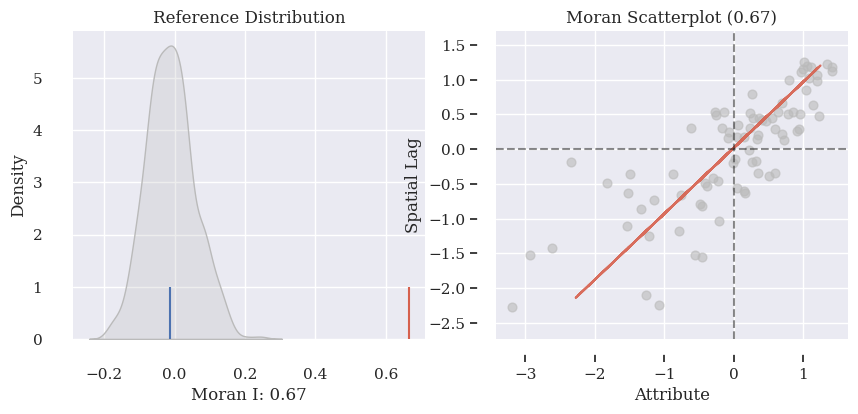

In [32]:
plot_moran(moran);

In [94]:
from splot import esda as esdaplot

In [14]:
print(moran2004.I, moran2021.I)

NameError: name 'moran2004' is not defined

In [72]:
moran.p_sim

0.001

In [95]:
lisa = esda.moran.Moran_Local(geojson_data["2004"], w)

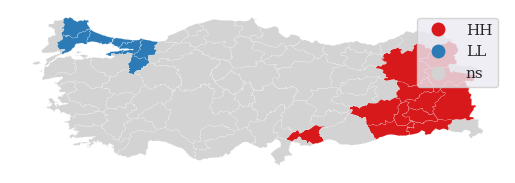

In [96]:
esdaplot.lisa_cluster(lisa, geojson_data, p=0.01)


# Display the figure
plt.show()

In [97]:
lisa1 = esda.moran.Moran_Local(geojson_data["2021"], w)

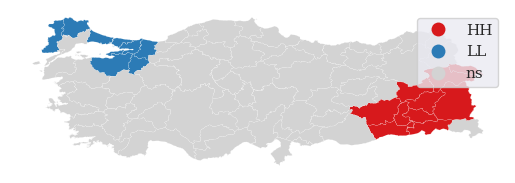

In [98]:
esdaplot.lisa_cluster(lisa1, geojson_data, p=0.01)


# Display the figure
plt.show()